In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf # veriyi alacağımız yer
from pandas_datareader import data as pdr
# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
import yfinance as yf
#from pandas_datareader import data as pdr
from datetime import datetime


In [57]:
sns.set_style('whitegrid') # tüm görselleştirmeler için bu stilin kullanılmasını sağlar. veya default stil seçilir
plt.style.use("fivethirtyeight") # tüm görselleştirmeler üzerinde bu stilin kullanılmasını sağlar. veya default stil seçilir
%matplotlib inline
# oluşturulacak figür jupiter notebooka gömülü olacak şekilde gözüksün

In [58]:
# Set up End and Start times for data grab
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['Apple', 'Google', 'Microsoft', 'Amazon']
dfs = []

end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in stocks: # verilerin alınması
    df = yf.download(stock, start_date, end_date)
    dfs.append(df)

for index, company_name in enumerate(company_names):
    dfs[index]['company_name'] = company_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [69]:
dfs[3]

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400,Amazon
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,Amazon
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,Amazon
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,Amazon
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,129101300,Amazon
...,...,...,...,...,...,...,...
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,Amazon
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400,Amazon
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500,Amazon


In [63]:
# tablolar hakkında
for df in dfs:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float

In [55]:
dfs[0].describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,164.338081,166.005240,162.826480,164.472040,164.128741,6.417764e+07
std,18.648764,18.483745,18.872515,18.658589,18.827457,2.001020e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,148.877495,150.544998,147.299995,148.819996,148.244354,5.042202e+07
50%,167.700005,169.405006,166.250000,167.925003,167.561653,5.891015e+07
75%,178.312504,180.052498,177.110004,178.555000,178.554108,7.134730e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.601569e+08


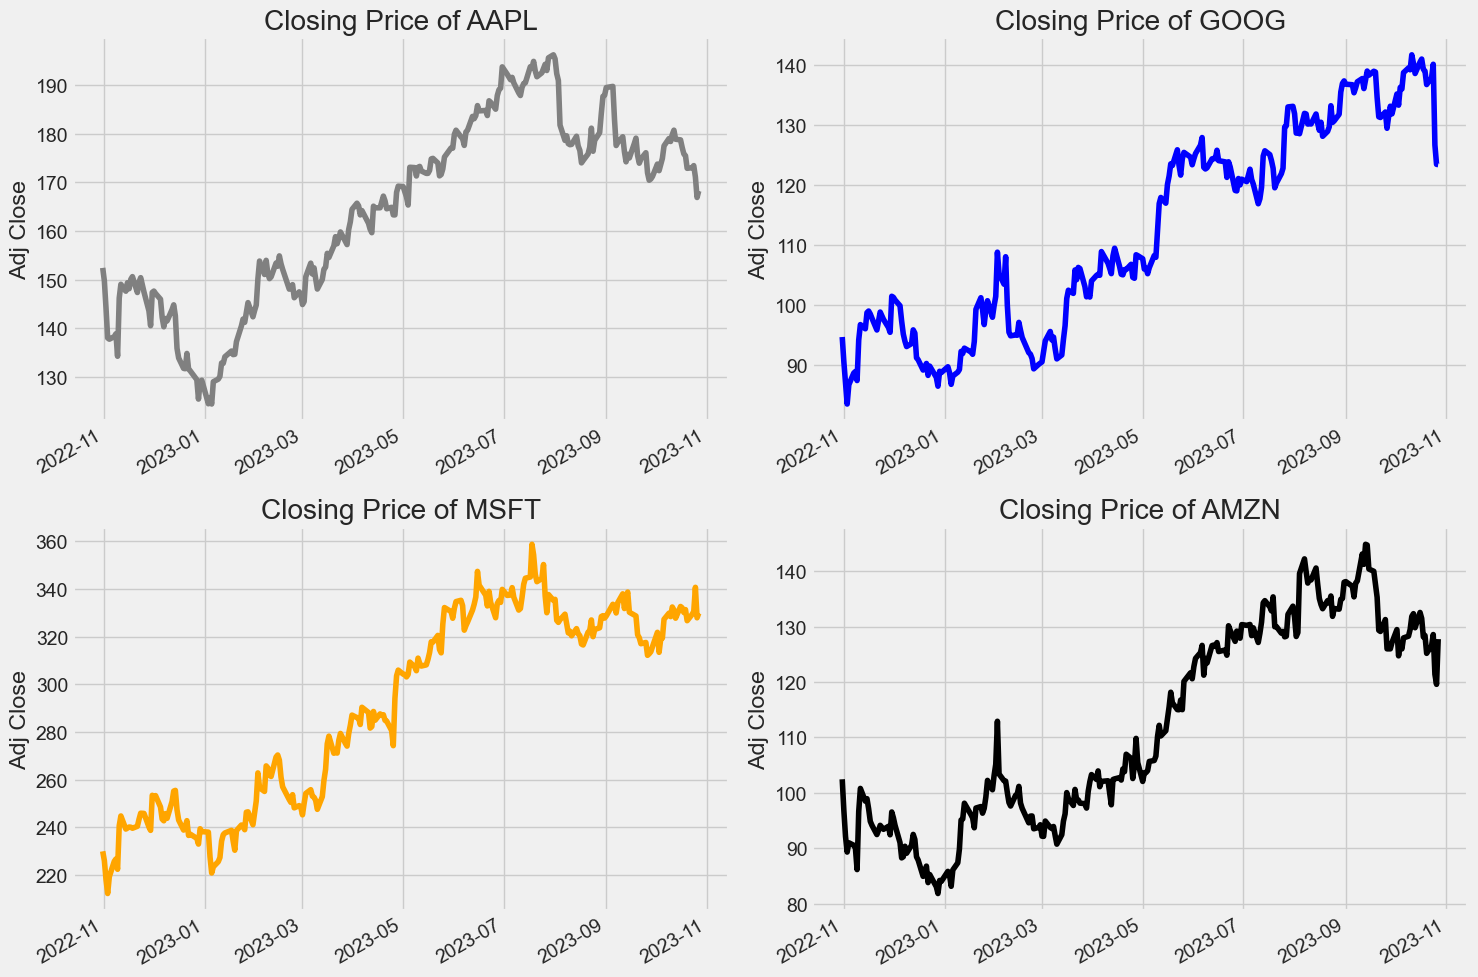

In [94]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = ['grey', 'blue', 'orange', 'black']

for i, company in enumerate(dfs, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i - 1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()